# Matuszyńska 2019

https://doi.org/10.1111/ppl.12962

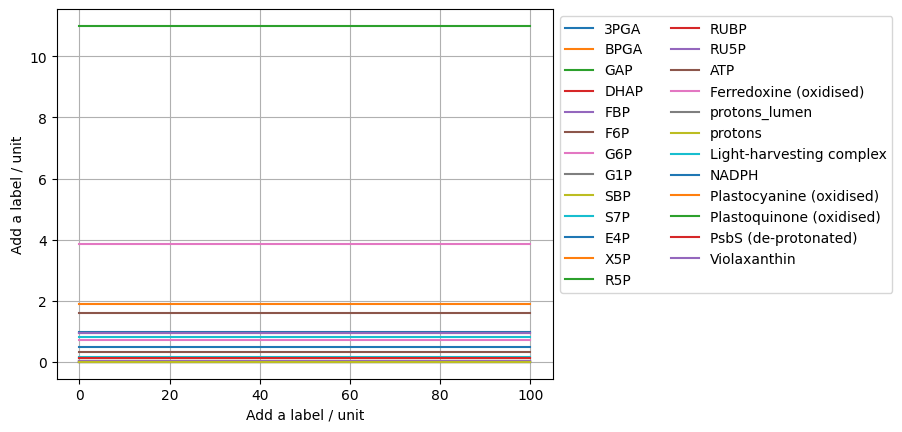

In [11]:
import numpy as np
import pandas as pd

from mxlbricks import get_matuszynska2019 as get_model
from mxlpy import Simulator, plot, unwrap
from mxlpy.integrators.int_assimulo import Assimulo

EPS = 1e-6

model = get_model()
res = unwrap(
    Simulator(model, integrator=Assimulo)
    .simulate(100)
    # .simulate(5)
    .get_result()
)

fig, ax = plot.lines(res.get_variables(include_derived=False, include_readouts=False))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), ncols=2)

if (
    diff := np.linalg.norm(
        pd.Series(model.variables) - pd.Series(res.get_new_y0()), ord=2
    )
) > EPS:
    msg = f"Diff between models too large: {diff}"
    raise ValueError(msg)